In [1]:
import pandas as pd
import numpy as np

In [2]:
#경고 뜨지 않도록
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 설정 
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [4]:
#wordcloud 설치
!pip install wordcloud

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

In [6]:
#데이터 불러오기 
#DACON에 올라와 있는 Raw 데이터는 아님! #깃허브에 공모전 참가했던 팀이 올려놓은 데이터를 가져와서 사용

In [7]:
## 아래와 같은 칼럼이 삭제 되어 있음
# jobkorea.drop(['Table Names','기업정보URL','상세내용','서류접수마감일자','잡코리아채용공고URL','잡코리아채용공고QR코드내용','채용공고등록일자','공유수','사업자등록번호',
#                '등록저장일시','채용공고최종수정일자','수정저장일시','사용여부','경력년수','급여수준명','연봉면접결정여부','접수방법정보명','근무형태명','모집인원명','채용직급직책명','근무지역명','삭제여부','급여유형정보명'], axis='columns', inplace=True)

### Import Data

In [8]:
data = pd.read_excel('잡코리아 채용공고.xlsx')
data

채용공고고유번호 경력년수정보명                                         해당채용공고키워드명  \
0      38576006   3년 이상                             영어;해외영업;고객관리;영업관리;영업지원   
1      38600961     NaN                                       건축설계;AutoCad   
2      38637664   1년 이상                                              배송;납품   
3      38659153   5년 이상          MySQL;AJAX;Java;jsp;php;API;C++;Linux;WAS   
4      38667088   5년 이상                   아이폰;안드로이드;Application;Java;Linux   
...         ...     ...                                                ...   
54893  34947504     NaN  보험영업;생명보험;재정설계;금융영업;보험설계;자산관리;재무상담;아웃바운드TM;증권·...   
54894  34947505     NaN  금융;자산관리사;지점장;투자상담;보험영업;생명보험;손해보험;재정설계;화재보험;금융영...   
54895  34947506     NaN  강사;행사 홍보;금융;텔러;보험영업;생명보험;재정설계;금융영업;보험설계;재무상담;영...   
54896  34947564   2년 이상               패키지디자이너;소비재;그래픽디자인;시각디자인;일러스트레이터;포토샵   
54897  34947577   3년 이상                 공작기계;절삭공구;CAD;CAM;MCT;금속;생산직;절단;제조   

       조회수         기업명                                             채용공고제목  \
0        6     ㈜창성소프트젤                                    제약기계 해외영업 2명 채용   
1        0   건축사사무소 세움                                건축사사무소세움 건축설계 직원 모집   
2        0    제이에스고려유통                                   거래처납품 및 창고관리사원모집   
3        1         ㈜코콤                              홈네트워크 서버 소프트웨어 개발자 모집   
4        1         ㈜코콤               (주)코콤 안드로이드 임베디드 단말기 소프트웨어 개발자(경력)모집   
...    ...         ...                                                ...   
54893    0  서울법인재무설계센터                   영업 / 강사 / 관리자 / 업체섭외자 / TM 사원 모집   
54894    0   한화생명보험(주)  --Here for good-- 2019 한화금융 금융컨설턴트 선발 / 입사후 1년...   
54895    0  서울법인재무설계센터               브리핑 영업 / 강사 / 조직 관리자 및 TM (섭외) 사원 모집   
54896    0       이안패키지                                      소비재 업무 담당자 모집   
54897    0       씨제이테크                                머시닝 센타 경력직 및 초보자 채용   

                                          업종직종정보명 경력조건정보명          급여수준정보명  \
0      기계·기계설비; 해외영업·무역영업; 제품·서비스영업; 영업관리·지원·영업기획   신입/경력  3000만원 ~ 4500만원   
1                          건축·설비·환경; 기계설계·CAD·CAM    관계없음              NaN   
2                              물류·운송·배송; 배송·택배·운송   신입/경력            250만원   
3           전기·전자·제어; 웹프로그래머; 응용프로그래머; DBA·데이터베이스      경력              NaN   
4                               전기·전자·제어; 응용프로그래머      경력              NaN   
...                                           ...     ...              ...   
54893                                         NaN    관계없음              NaN   
54894                                         NaN    관계없음              NaN   
54895                                         NaN    관계없음              NaN   
54896                                         NaN      경력              NaN   
54897                                         NaN   신입/경력  3000만원 ~ 5000만원   

        학력제한정보명    데이터기준일자  
0        대졸(4년) 2021-10-01  
1          학력무관 2021-10-02  
2          학력무관 2021-10-01  
3      대졸(2~3년) 2021-10-01  
4      대졸(2~3년) 2021-10-01  
...         ...        ...  
54893        고졸 2020-02-29  
54894  대졸(2~3년) 2020-02-29  
54895        고졸 2020-02-29  
54896  대졸(2~3년) 2020-02-29  
54897      학력무관 2020-02-29  

[54898 rows x 11 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54898 entries, 0 to 54897
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   채용공고고유번호    54898 non-null  int64         
 1   경력년수정보명     26693 non-null  object        
 2   해당채용공고키워드명  54898 non-null  object        
 3   조회수         54898 non-null  int64         
 4   기업명         54898 non-null  object        
 5   채용공고제목      54898 non-null  object        
 6   업종직종정보명     4381 non-null   object        
 7   경력조건정보명     54898 non-null  object        
 8   급여수준정보명     29216 non-null  object        
 9   학력제한정보명     54898 non-null  object        
 10  데이터기준일자     54898 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 4.6+ MB


- 업족직종정보명은 null값이 총 데이터의 90% 이상으로 사용하지 않는 것으로 결정


In [10]:
#데이터가 언제부터 있는지 확인하기 위해 날짜 기준 sort_values
#2019년 11월21일부터 ~ 2021년 11월3일까지 있음
#2019년은 202년, 2021년에 비해 데이터가 적으므로 제외해야 될 것으로 생각됨
data.sort_values(by='데이터기준일자')

채용공고고유번호 경력년수정보명                                         해당채용공고키워드명  \
4267   34152316   1년 이상  부동산개발;부동산관리;토지개발;더존;문서관리;문서작성;사무보조;4대보험;경리;경영지...   
35231  34333664     NaN  물류;물류센터;배송;운송;육상운송;납품;물류관리;택배;중장비운전;지게차운전;포장이사...   
35234  34355026     NaN               쇼핑몰;B2B;B2C;교육기획;교육진행;교재컨텐츠개발;교육프로그램   
35235  34355838     NaN                    MD;온라인MD;온라인마케팅;웹마케팅;쇼핑몰;웹사이트운영   
35237  34361520     NaN                 어학원;유아교육;유치원;학원강사;결산;경리;경영지원;세무;출납   
...         ...     ...                                                ...   
4154   39601126     NaN  조리사;홀써빙;양식당;프랜차이즈;매장관리;바리스타;판매관리;프런트;제과점;제빵사;푸...   
4153   39601124   1년 이상  보험영업;생명보험;손해보험;재정설계;화재보험;개인고객영업;금융영업;금융자산관리사;보...   
4152   39601122   1년 이상  보험영업;생명보험;손해보험;재정설계;화재보험;개인고객영업;금융영업;금융자산관리사;보...   
4150   39601119   1년 이상  보험영업;생명보험;손해보험;재정설계;화재보험;개인고객영업;금융영업;금융자산관리사;보...   
4118   39600993     NaN             웨이터;웨이트리스;조리사;홀써빙;컨시어지;프런트;호텔사무;골프장;캐디   

       조회수           기업명                                     채용공고제목  \
4267     0         J R&D       (월250이상/정규직) 사무보조/인사경리/SNS관리 각부서별 채용   
35231    0       에스에이엠통운                  [야간;주간근무]E마트상품 배송/납품기사 모집   
35234    0           ㈜오늘                      ㈜오늘에서 아동미술 프로그램연구진 모집   
35235    0       ㈜대호종합상사                         웹기획;웹마케팅;웹PM;온라인MD   
35237    0   칠드런스뮤지컬컴퍼니㈜                              영어유치부 행정교사 모집   
...    ...           ...                                        ...   
4154     0        나리스키친㈜                  나리스 키친 이탈리안 레스토랑 주방 직원 모집   
4153     0          리치앤코  [기본급 최대 900만] GA 지점장 사업단장 모집 [강남/부천/부평 外]   
4152     0          리치앤코  [기본급 최대 900만] GA 지점장 사업단장 모집 [관악/성남/인천 外]   
4150     0          리치앤코  [기본급 최대 900만] GA 지점장 사업단장 모집 [강북/강동/인천 外]   
4118     0  KGCA한국골프캐디협회                     골프장호텔 //외식사업부 (정규직원)모집   

                                         업종직종정보명 경력조건정보명          급여수준정보명  \
4267                                         NaN   신입/경력    240만원 ~ 500만원   
35231                                        NaN    관계없음    450만원 ~ 500만원   
35234                                        NaN    관계없음              NaN   
35235                                        NaN    관계없음  2000만원 ~ 3000만원   
35237                                        NaN    관계없음              NaN   
...                                          ...     ...              ...   
4154   음식료·외식·프랜차이즈; 요리·영양·제과제빵·바리스타; 판매·캐셔·매장관리    관계없음              NaN   
4153    증권·보험·카드; 금융·보험영업; 영업관리·지원·영업기획; 아웃바운드TM      경력              NaN   
4152    증권·보험·카드; 금융·보험영업; 영업관리·지원·영업기획; 아웃바운드TM      경력              NaN   
4150    증권·보험·카드; 금융·보험영업; 영업관리·지원·영업기획; 아웃바운드TM      경력              NaN   
4118              음식료·외식·프랜차이즈; 여행·항공·숙박; 레저·스포츠      신입  2700만원 ~ 3000만원   

        학력제한정보명    데이터기준일자  
4267       학력무관 2019-11-21  
35231      학력무관 2019-12-14  
35234      학력무관 2019-12-17  
35235        고졸 2019-12-17  
35237  대졸(2~3년) 2019-12-17  
...         ...        ...  
4154       학력무관 2021-11-03  
4153       학력무관 2021-11-03  
4152       학력무관 2021-11-03  
4150       학력무관 2021-11-03  
4118       학력무관 2021-11-03  

[54898 rows x 11 columns]

- 2019년 데이터는 2020년과 2021년 데이터에 비해 현저히 적으므로 이번 데이터분석 목적과 부합하지 않아 제외하는 것으로 결정

In [11]:
#2019년 데이터 제외
#인덱스도 다시 부여
data2 = data[data['데이터기준일자'] >= '2020-01-01']
data2.reset_index()
data2

채용공고고유번호 경력년수정보명                                         해당채용공고키워드명  \
0      38576006   3년 이상                             영어;해외영업;고객관리;영업관리;영업지원   
1      38600961     NaN                                       건축설계;AutoCad   
2      38637664   1년 이상                                              배송;납품   
3      38659153   5년 이상          MySQL;AJAX;Java;jsp;php;API;C++;Linux;WAS   
4      38667088   5년 이상                   아이폰;안드로이드;Application;Java;Linux   
...         ...     ...                                                ...   
54893  34947504     NaN  보험영업;생명보험;재정설계;금융영업;보험설계;자산관리;재무상담;아웃바운드TM;증권·...   
54894  34947505     NaN  금융;자산관리사;지점장;투자상담;보험영업;생명보험;손해보험;재정설계;화재보험;금융영...   
54895  34947506     NaN  강사;행사 홍보;금융;텔러;보험영업;생명보험;재정설계;금융영업;보험설계;재무상담;영...   
54896  34947564   2년 이상               패키지디자이너;소비재;그래픽디자인;시각디자인;일러스트레이터;포토샵   
54897  34947577   3년 이상                 공작기계;절삭공구;CAD;CAM;MCT;금속;생산직;절단;제조   

       조회수         기업명                                             채용공고제목  \
0        6     ㈜창성소프트젤                                    제약기계 해외영업 2명 채용   
1        0   건축사사무소 세움                                건축사사무소세움 건축설계 직원 모집   
2        0    제이에스고려유통                                   거래처납품 및 창고관리사원모집   
3        1         ㈜코콤                              홈네트워크 서버 소프트웨어 개발자 모집   
4        1         ㈜코콤               (주)코콤 안드로이드 임베디드 단말기 소프트웨어 개발자(경력)모집   
...    ...         ...                                                ...   
54893    0  서울법인재무설계센터                   영업 / 강사 / 관리자 / 업체섭외자 / TM 사원 모집   
54894    0   한화생명보험(주)  --Here for good-- 2019 한화금융 금융컨설턴트 선발 / 입사후 1년...   
54895    0  서울법인재무설계센터               브리핑 영업 / 강사 / 조직 관리자 및 TM (섭외) 사원 모집   
54896    0       이안패키지                                      소비재 업무 담당자 모집   
54897    0       씨제이테크                                머시닝 센타 경력직 및 초보자 채용   

                                          업종직종정보명 경력조건정보명          급여수준정보명  \
0      기계·기계설비; 해외영업·무역영업; 제품·서비스영업; 영업관리·지원·영업기획   신입/경력  3000만원 ~ 4500만원   
1                          건축·설비·환경; 기계설계·CAD·CAM    관계없음              NaN   
2                              물류·운송·배송; 배송·택배·운송   신입/경력            250만원   
3           전기·전자·제어; 웹프로그래머; 응용프로그래머; DBA·데이터베이스      경력              NaN   
4                               전기·전자·제어; 응용프로그래머      경력              NaN   
...                                           ...     ...              ...   
54893                                         NaN    관계없음              NaN   
54894                                         NaN    관계없음              NaN   
54895                                         NaN    관계없음              NaN   
54896                                         NaN      경력              NaN   
54897                                         NaN   신입/경력  3000만원 ~ 5000만원   

        학력제한정보명    데이터기준일자  
0        대졸(4년) 2021-10-01  
1          학력무관 2021-10-02  
2          학력무관 2021-10-01  
3      대졸(2~3년) 2021-10-01  
4      대졸(2~3년) 2021-10-01  
...         ...        ...  
54893        고졸 2020-02-29  
54894  대졸(2~3년) 2020-02-29  
54895        고졸 2020-02-29  
54896  대졸(2~3년) 2020-02-29  
54897      학력무관 2020-02-29  

[54808 rows x 11 columns]

In [12]:
#혹시 모를 복사본 만들기
data3 = data2.copy()

## 1. 채용공고별 키워드 추출
#### '해당채용공고키워드명' 칼럼 사용

In [13]:
#';'으로 구분되어 있는 해당채용공고키워드명을 ';'기준으로 split
data2['해당채용공고키워드명']=data2['해당채용공고키워드명'].str.split(';')
data2['해당채용공고키워드명']

0                             [영어, 해외영업, 고객관리, 영업관리, 영업지원]
1                                          [건축설계, AutoCad]
2                                                 [배송, 납품]
3        [MySQL, AJAX, Java, jsp, php, API, C++, Linux,...
4                   [아이폰, 안드로이드, Application, Java, Linux]
                               ...                        
54893    [보험영업, 생명보험, 재정설계, 금융영업, 보험설계, 자산관리, 재무상담, 아웃바...
54894    [금융, 자산관리사, 지점장, 투자상담, 보험영업, 생명보험, 손해보험, 재정설계,...
54895    [강사, 행사 홍보, 금융, 텔러, 보험영업, 생명보험, 재정설계, 금융영업, 보험...
54896          [패키지디자이너, 소비재, 그래픽디자인, 시각디자인, 일러스트레이터, 포토샵]
54897         [공작기계, 절삭공구, CAD, CAM, MCT, 금속, 생산직, 절단, 제조]
Name: 해당채용공고키워드명, Length: 54808, dtype: object

- 각 채용공고키워드명에 포함되어 있는 단어의 개수가 다름
- 잡코리아 홈페이지에서 확인해본 결과 거의 모든 공고에 다양한 키워드가 들어가 있으므로 현 분석에서는 앞에서부터 3개의 단어만 포함하기로 결정

In [14]:
###앞에 키워드 3개만 가져오는 함수###
def words(x):
    if len(x)>3:
        return (', ').join(x[:3])
    else:
        return (', ').join(x)

In [15]:
data2['해당채용공고키워드명']=data2['해당채용공고키워드명'].apply(words)
data2['해당채용공고키워드명']

0                 영어, 해외영업, 고객관리
1                  건축설계, AutoCad
2                         배송, 납품
3              MySQL, AJAX, Java
4        아이폰, 안드로이드, Application
                  ...           
54893           보험영업, 생명보험, 재정설계
54894             금융, 자산관리사, 지점장
54895              강사, 행사 홍보, 금융
54896       패키지디자이너, 소비재, 그래픽디자인
54897            공작기계, 절삭공구, CAD
Name: 해당채용공고키워드명, Length: 54808, dtype: object

In [16]:
#현재까지 데이터 확인
data2.head()

채용공고고유번호 경력년수정보명               해당채용공고키워드명  조회수        기업명  \
0  38576006   3년 이상           영어, 해외영업, 고객관리    6    ㈜창성소프트젤   
1  38600961     NaN            건축설계, AutoCad    0  건축사사무소 세움   
2  38637664   1년 이상                   배송, 납품    0   제이에스고려유통   
3  38659153   5년 이상        MySQL, AJAX, Java    1        ㈜코콤   
4  38667088   5년 이상  아이폰, 안드로이드, Application    1        ㈜코콤   

                                 채용공고제목  \
0                       제약기계 해외영업 2명 채용   
1                   건축사사무소세움 건축설계 직원 모집   
2                      거래처납품 및 창고관리사원모집   
3                 홈네트워크 서버 소프트웨어 개발자 모집   
4  (주)코콤 안드로이드 임베디드 단말기 소프트웨어 개발자(경력)모집   

                                      업종직종정보명 경력조건정보명          급여수준정보명  \
0  기계·기계설비; 해외영업·무역영업; 제품·서비스영업; 영업관리·지원·영업기획   신입/경력  3000만원 ~ 4500만원   
1                      건축·설비·환경; 기계설계·CAD·CAM    관계없음              NaN   
2                          물류·운송·배송; 배송·택배·운송   신입/경력            250만원   
3       전기·전자·제어; 웹프로그래머; 응용프로그래머; DBA·데이터베이스      경력              NaN   
4                           전기·전자·제어; 응용프로그래머      경력              NaN   

    학력제한정보명    데이터기준일자  
0    대졸(4년) 2021-10-01  
1      학력무관 2021-10-02  
2      학력무관 2021-10-01  
3  대졸(2~3년) 2021-10-01  
4  대졸(2~3년) 2021-10-01

## 2. 급여수준정보 전처리
- 급여수준정보에 있는 데이터가 9,000원~6,000만원까지 매우 크게 분포되어 있어 분류가 필요
- 단기, 월급, 연봉으로 분류

In [17]:
#평균으로 대체하는 함수
def replace_with_mean(s):
    if(s):
        a, *b = s.split(' ')
        a = a.replace('만원','')
        if len(b) == 2:
            b = b[1]
            b = b.replace('만원','')

            c = (int(a) + int(b))//2
        
            return str(c)+'만원'
        else:
            print(a, b)
            return s
    else:
        print(a, b)
        return s

In [18]:
data2.loc[:,'급여수준정보명'] = data2.급여수준정보명.fillna('추후협의')
data2

채용공고고유번호 경력년수정보명               해당채용공고키워드명  조회수         기업명  \
0      38576006   3년 이상           영어, 해외영업, 고객관리    6     ㈜창성소프트젤   
1      38600961     NaN            건축설계, AutoCad    0   건축사사무소 세움   
2      38637664   1년 이상                   배송, 납품    0    제이에스고려유통   
3      38659153   5년 이상        MySQL, AJAX, Java    1         ㈜코콤   
4      38667088   5년 이상  아이폰, 안드로이드, Application    1         ㈜코콤   
...         ...     ...                      ...  ...         ...   
54893  34947504     NaN         보험영업, 생명보험, 재정설계    0  서울법인재무설계센터   
54894  34947505     NaN           금융, 자산관리사, 지점장    0   한화생명보험(주)   
54895  34947506     NaN            강사, 행사 홍보, 금융    0  서울법인재무설계센터   
54896  34947564   2년 이상     패키지디자이너, 소비재, 그래픽디자인    0       이안패키지   
54897  34947577   3년 이상          공작기계, 절삭공구, CAD    0       씨제이테크   

                                                  채용공고제목  \
0                                        제약기계 해외영업 2명 채용   
1                                    건축사사무소세움 건축설계 직원 모집   
2                                       거래처납품 및 창고관리사원모집   
3                                  홈네트워크 서버 소프트웨어 개발자 모집   
4                   (주)코콤 안드로이드 임베디드 단말기 소프트웨어 개발자(경력)모집   
...                                                  ...   
54893                   영업 / 강사 / 관리자 / 업체섭외자 / TM 사원 모집   
54894  --Here for good-- 2019 한화금융 금융컨설턴트 선발 / 입사후 1년...   
54895               브리핑 영업 / 강사 / 조직 관리자 및 TM (섭외) 사원 모집   
54896                                      소비재 업무 담당자 모집   
54897                                머시닝 센타 경력직 및 초보자 채용   

                                          업종직종정보명 경력조건정보명          급여수준정보명  \
0      기계·기계설비; 해외영업·무역영업; 제품·서비스영업; 영업관리·지원·영업기획   신입/경력  3000만원 ~ 4500만원   
1                          건축·설비·환경; 기계설계·CAD·CAM    관계없음             추후협의   
2                              물류·운송·배송; 배송·택배·운송   신입/경력            250만원   
3           전기·전자·제어; 웹프로그래머; 응용프로그래머; DBA·데이터베이스      경력             추후협의   
4                               전기·전자·제어; 응용프로그래머      경력             추후협의   
...                                           ...     ...              ...   
54893                                         NaN    관계없음             추후협의   
54894                                         NaN    관계없음             추후협의   
54895                                         NaN    관계없음             추후협의   
54896                                         NaN      경력             추후협의   
54897                                         NaN   신입/경력  3000만원 ~ 5000만원   

        학력제한정보명    데이터기준일자  
0        대졸(4년) 2021-10-01  
1          학력무관 2021-10-02  
2          학력무관 2021-10-01  
3      대졸(2~3년) 2021-10-01  
4      대졸(2~3년) 2021-10-01  
...         ...        ...  
54893        고졸 2020-02-29  
54894  대졸(2~3년) 2020-02-29  
54895        고졸 2020-02-29  
54896  대졸(2~3년) 2020-02-29  
54897      학력무관 2020-02-29  

[54808 rows x 11 columns]

In [19]:
data2.급여수준정보명 = data2[data2.급여수준정보명.str.contains('~')].급여수준정보명.apply(replace_with_mean)
data2

채용공고고유번호 경력년수정보명               해당채용공고키워드명  조회수         기업명  \
0      38576006   3년 이상           영어, 해외영업, 고객관리    6     ㈜창성소프트젤   
1      38600961     NaN            건축설계, AutoCad    0   건축사사무소 세움   
2      38637664   1년 이상                   배송, 납품    0    제이에스고려유통   
3      38659153   5년 이상        MySQL, AJAX, Java    1         ㈜코콤   
4      38667088   5년 이상  아이폰, 안드로이드, Application    1         ㈜코콤   
...         ...     ...                      ...  ...         ...   
54893  34947504     NaN         보험영업, 생명보험, 재정설계    0  서울법인재무설계센터   
54894  34947505     NaN           금융, 자산관리사, 지점장    0   한화생명보험(주)   
54895  34947506     NaN            강사, 행사 홍보, 금융    0  서울법인재무설계센터   
54896  34947564   2년 이상     패키지디자이너, 소비재, 그래픽디자인    0       이안패키지   
54897  34947577   3년 이상          공작기계, 절삭공구, CAD    0       씨제이테크   

                                                  채용공고제목  \
0                                        제약기계 해외영업 2명 채용   
1                                    건축사사무소세움 건축설계 직원 모집   
2                                       거래처납품 및 창고관리사원모집   
3                                  홈네트워크 서버 소프트웨어 개발자 모집   
4                   (주)코콤 안드로이드 임베디드 단말기 소프트웨어 개발자(경력)모집   
...                                                  ...   
54893                   영업 / 강사 / 관리자 / 업체섭외자 / TM 사원 모집   
54894  --Here for good-- 2019 한화금융 금융컨설턴트 선발 / 입사후 1년...   
54895               브리핑 영업 / 강사 / 조직 관리자 및 TM (섭외) 사원 모집   
54896                                      소비재 업무 담당자 모집   
54897                                머시닝 센타 경력직 및 초보자 채용   

                                          업종직종정보명 경력조건정보명 급여수준정보명   학력제한정보명  \
0      기계·기계설비; 해외영업·무역영업; 제품·서비스영업; 영업관리·지원·영업기획   신입/경력  3750만원    대졸(4년)   
1                          건축·설비·환경; 기계설계·CAD·CAM    관계없음     NaN      학력무관   
2                              물류·운송·배송; 배송·택배·운송   신입/경력     NaN      학력무관   
3           전기·전자·제어; 웹프로그래머; 응용프로그래머; DBA·데이터베이스      경력     NaN  대졸(2~3년)   
4                               전기·전자·제어; 응용프로그래머      경력     NaN  대졸(2~3년)   
...                                           ...     ...     ...       ...   
54893                                         NaN    관계없음     NaN        고졸   
54894                                         NaN    관계없음     NaN  대졸(2~3년)   
54895                                         NaN    관계없음     NaN        고졸   
54896                                         NaN      경력     NaN  대졸(2~3년)   
54897                                         NaN   신입/경력  4000만원      학력무관   

         데이터기준일자  
0     2021-10-01  
1     2021-10-02  
2     2021-10-01  
3     2021-10-01  
4     2021-10-01  
...          ...  
54893 2020-02-29  
54894 2020-02-29  
54895 2020-02-29  
54896 2020-02-29  
54897 2020-02-29  

[54808 rows x 11 columns]

In [20]:
data2.loc[:,'급여수준정보명'] = data2.급여수준정보명.fillna('추후협의')
data2

채용공고고유번호 경력년수정보명               해당채용공고키워드명  조회수         기업명  \
0      38576006   3년 이상           영어, 해외영업, 고객관리    6     ㈜창성소프트젤   
1      38600961     NaN            건축설계, AutoCad    0   건축사사무소 세움   
2      38637664   1년 이상                   배송, 납품    0    제이에스고려유통   
3      38659153   5년 이상        MySQL, AJAX, Java    1         ㈜코콤   
4      38667088   5년 이상  아이폰, 안드로이드, Application    1         ㈜코콤   
...         ...     ...                      ...  ...         ...   
54893  34947504     NaN         보험영업, 생명보험, 재정설계    0  서울법인재무설계센터   
54894  34947505     NaN           금융, 자산관리사, 지점장    0   한화생명보험(주)   
54895  34947506     NaN            강사, 행사 홍보, 금융    0  서울법인재무설계센터   
54896  34947564   2년 이상     패키지디자이너, 소비재, 그래픽디자인    0       이안패키지   
54897  34947577   3년 이상          공작기계, 절삭공구, CAD    0       씨제이테크   

                                                  채용공고제목  \
0                                        제약기계 해외영업 2명 채용   
1                                    건축사사무소세움 건축설계 직원 모집   
2                                       거래처납품 및 창고관리사원모집   
3                                  홈네트워크 서버 소프트웨어 개발자 모집   
4                   (주)코콤 안드로이드 임베디드 단말기 소프트웨어 개발자(경력)모집   
...                                                  ...   
54893                   영업 / 강사 / 관리자 / 업체섭외자 / TM 사원 모집   
54894  --Here for good-- 2019 한화금융 금융컨설턴트 선발 / 입사후 1년...   
54895               브리핑 영업 / 강사 / 조직 관리자 및 TM (섭외) 사원 모집   
54896                                      소비재 업무 담당자 모집   
54897                                머시닝 센타 경력직 및 초보자 채용   

                                          업종직종정보명 경력조건정보명 급여수준정보명   학력제한정보명  \
0      기계·기계설비; 해외영업·무역영업; 제품·서비스영업; 영업관리·지원·영업기획   신입/경력  3750만원    대졸(4년)   
1                          건축·설비·환경; 기계설계·CAD·CAM    관계없음    추후협의      학력무관   
2                              물류·운송·배송; 배송·택배·운송   신입/경력    추후협의      학력무관   
3           전기·전자·제어; 웹프로그래머; 응용프로그래머; DBA·데이터베이스      경력    추후협의  대졸(2~3년)   
4                               전기·전자·제어; 응용프로그래머      경력    추후협의  대졸(2~3년)   
...                                           ...     ...     ...       ...   
54893                                         NaN    관계없음    추후협의        고졸   
54894                                         NaN    관계없음    추후협의  대졸(2~3년)   
54895                                         NaN    관계없음    추후협의        고졸   
54896                                         NaN      경력    추후협의  대졸(2~3년)   
54897                                         NaN   신입/경력  4000만원      학력무관   

         데이터기준일자  
0     2021-10-01  
1     2021-10-02  
2     2021-10-01  
3     2021-10-01  
4     2021-10-01  
...          ...  
54893 2020-02-29  
54894 2020-02-29  
54895 2020-02-29  
54896 2020-02-29  
54897 2020-02-29  

[54808 rows x 11 columns]

In [21]:
data3 = data2[~(data2.급여수준정보명 == '추후협의')]
data3.급여수준정보명 = data3.loc[:,'급여수준정보명'].str.replace('만원','000')  #  왜 000인지,,? ;;
data3.급여수준정보명 = data3.loc[:,'급여수준정보명'].astype(int)
data3 = data3.sort_values(by='급여수준정보명', ascending=False)
data3

채용공고고유번호 경력년수정보명                 해당채용공고키워드명  조회수              기업명  \
44246  36617438     NaN         고액연봉, 법인컨설팅, 온라인영업    0           한국보험금융   
11348  34583625     NaN             화장품, 생산관리, 생산직    0          엠코(MCO)   
14997  34599829     NaN             화장품, 생산관리, 생산직    0          엠코(MCO)   
13522  34593227     NaN             화장품, 생산관리, 생산직    0          엠코(MCO)   
26538  34673282   1년 이상                      자동차정비    0  르노삼성자동차 공도정비사업소   
...         ...     ...                        ...  ...              ...   
29455  34685855     NaN                시설관리, 청소·미화    0          주) 마이더스   
52962  34938567     NaN  사무보조, 제조판매관리자, 화장품제조판매관리자    0              타이니   
11820  34585991   1년 이상             세무회계사무소, 부가세신고    0        김선욱세무사사무소   
47611  34912566     NaN            쇼핑몰, mHTML, php    0           영동아이앤디   
52222  34935059     NaN                       사회복지    0      에바다장애인종합복지관   

                                            채용공고제목 업종직종정보명 경력조건정보명   급여수준정보명  \
44246  [월 평균급여 500만원] 언택트(비대면) 재무설계사 특별채용 [한국보험금융]     NaN    관계없음  65000000   
11348    [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
14997    [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
13522    [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
26538                    자동차 일반정비 신입/경력 기사님을모집합니다.     NaN   신입/경력  51049000   
...                                            ...     ...     ...       ...   
29455                           (안양역) 휘트니센터 미화원 모집     NaN    관계없음     35000   
52962               화장품 제조판매 관리자  (이공계학과 전공자) 재택근무     NaN    관계없음     25000   
11820                                   부가세알바모집합니다     NaN      경력     15000   
47611          온라인쇼핑몰(퍼스트몰; 카페24;고도몰)유지보수 프리랜서 경험자     NaN    관계없음      1000   
52222                 2020년 직원 공개채용(정규직-직업지원팀) 재실시     NaN    관계없음      1000   

        학력제한정보명    데이터기준일자  
44246      학력무관 2020-11-01  
11348  대졸(2~3년) 2020-01-15  
14997  대졸(2~3년) 2020-01-17  
13522  대졸(2~3년) 2020-01-16  
26538      학력무관 2020-01-29  
...         ...        ...  
29455      학력무관 2020-01-30  
52962  대졸(2~3년) 2020-02-29  
11820      학력무관 2020-01-15  
47611      학력무관 2020-02-26  
52222      학력무관 2020-02-28  

[19571 rows x 11 columns]

In [22]:
# 연봉
yearly = data3[data3.급여수준정보명 >= 10000000]
yearly

채용공고고유번호 경력년수정보명           해당채용공고키워드명  조회수                기업명  \
44246  36617438     NaN   고액연봉, 법인컨설팅, 온라인영업    0             한국보험금융   
11348  34583625     NaN       화장품, 생산관리, 생산직    0            엠코(MCO)   
14997  34599829     NaN       화장품, 생산관리, 생산직    0            엠코(MCO)   
13522  34593227     NaN       화장품, 생산관리, 생산직    0            엠코(MCO)   
26538  34673282   1년 이상                자동차정비    0    르노삼성자동차 공도정비사업소   
...         ...     ...                  ...  ...                ...   
44214  36617276     NaN  공인중개사, 모델하우스, 부동산투자    0              애플디엔씨   
5412   38004392   1년 이상  모바일게임, 모바일App, 스마트폰    0  79플랫폼(79platform)   
44191  36617194     NaN     공인중개사, 부동산관리, 분양    0               창조시티   
2260   38806195   1년 이상  모바일게임, 모바일App, 스마트폰    0  79플랫폼(79platform)   
33197  38266506   1년 이상  모바일게임, 모바일App, 스마트폰    0  79플랫폼(79platform)   

                                            채용공고제목 업종직종정보명 경력조건정보명   급여수준정보명  \
44246  [월 평균급여 500만원] 언택트(비대면) 재무설계사 특별채용 [한국보험금융]     NaN    관계없음  65000000   
11348    [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
14997    [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
13522    [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
26538                    자동차 일반정비 신입/경력 기사님을모집합니다.     NaN   신입/경력  51049000   
...                                            ...     ...     ...       ...   
44214           [월500만] 대기업브랜드 분양상담사 신입 및 경력자 특별채용     NaN    관계없음  10000000   
5412          [롯데월드타워 입주사] 식품MD 분야별 대모집 - 업계최고복지 -     NaN   신입/경력  10000000   
44191                            부동산 분양 초보자 경력자 모집     NaN    관계없음  10000000   
2260      [롯데월드타워 입주사] 식품 oem 상품개발 MD  - 업계 최고복지 -     NaN   신입/경력  10000000   
33197    [롯데월드타워 입주사] 온라인 쇼핑몰 채널판매 MD  - 업계 최고복지 -     NaN   신입/경력  10000000   

        학력제한정보명    데이터기준일자  
44246      학력무관 2020-11-01  
11348  대졸(2~3년) 2020-01-15  
14997  대졸(2~3년) 2020-01-17  
13522  대졸(2~3년) 2020-01-16  
26538      학력무관 2020-01-29  
...         ...        ...  
44214      학력무관 2020-11-01  
5412       학력무관 2021-05-03  
44191      학력무관 2020-11-01  
2260       학력무관 2021-08-02  
33197      학력무관 2021-06-02  

[214 rows x 11 columns]

In [23]:
# 월급
monthly = data3[(data3.급여수준정보명 >= 1000000) &(data3.급여수준정보명 < 10000000)] # 100만원 - 1000만원
monthly

채용공고고유번호 경력년수정보명            해당채용공고키워드명  조회수          기업명  \
54193  34944218     NaN        저축은행, 채권, 채권추심    0      링크론대부중개   
16545  34606840     NaN        저축은행, 채권, 채권추심    0      링크론대부중개   
23444  34659114     NaN        저축은행, 채권, 채권추심    0      링크론대부중개   
19357  34619074     NaN        저축은행, 채권, 채권추심    0      링크론대부중개   
50590  34927712     NaN        저축은행, 채권, 채권추심    0      링크론대부중개   
...         ...     ...                   ...  ...          ...   
13015  34590880   1년 이상  공인중개사, 부동산서비스, 부동산중개    0  플러스공인중개사사무소   
1813   38804146   1년 이상  공인중개사, 부동산서비스, 부동산중개    0   우솔공인중개사사무소   
25900  34670666   1년 이상  공인중개사, 부동산서비스, 부동산중개    0  플러스공인중개사사무소   
269    39293067   6년 이상               SI, DBA    0          ㈜암펠   
6358   34470821   1년 이상  공인중개사, 부동산중개, 부동산컨설팅    0    공인중개사무소 정   

                                       채용공고제목  \
54193         [대출 상담] 평균급여 350만 이상/대출고객상담원 모집   
16545      [대출 상담] 평균급여 350만 이상 / 대출 고객상담원 채용   
23444      [대출 상담] 평균급여 350만 이상 / 대출 고객상담원 모집   
19357      [대출 상담] 평균급여 350만 이상 / 대출 고객상담원 채용   
50590        [대출 상담] 평균급여 350만 이상 /대출고객상담원 모집   
...                                       ...   
13015              플러스부동산 상반기영업사원채용 ((높은수수료))   
1813   [월1000만원]부동산 중개 및 분양 컨설팅 신입환영 1대1 맞춤교육   
25900              플러스부동산 상반기영업사원채용 ((높은수수료))   
269                    금융권 마이데이터 단기 DBA 고급 특급   
6358            [신입/경력] 부동산 컨설턴트 및 영업사원 채용 공고   

                                        업종직종정보명 경력조건정보명  급여수준정보명 학력제한정보명  \
54193                                       NaN    관계없음  9600000    학력무관   
16545                                       NaN    관계없음  9600000    학력무관   
23444                                       NaN    관계없음  9600000    학력무관   
19357                                       NaN    관계없음  9600000    학력무관   
50590                                       NaN    관계없음  9600000    학력무관   
...                                         ...     ...      ...     ...   
13015                                       NaN   신입/경력  1000000      고졸   
1813                                        NaN   신입/경력  1000000    학력무관   
25900                                       NaN   신입/경력  1000000      고졸   
269    솔루션·SI·CRM·ERP; DBA·데이터베이스; ERP·시스템분석·설계      경력  1000000      고졸   
6358                                        NaN   신입/경력  1000000      고졸   

         데이터기준일자  
54193 2020-02-29  
16545 2020-01-17  
23444 2020-01-24  
19357 2020-01-19  
50590 2020-02-27  
...          ...  
13015 2020-01-16  
1813  2021-08-01  
25900 2020-01-29  
269   2021-10-01  
6358  2020-01-14  

[11603 rows x 11 columns]

In [24]:
# 단기
daily = data3[data3.급여수준정보명 < 1000000]
daily

채용공고고유번호 경력년수정보명                 해당채용공고키워드명  조회수          기업명  \
28609  34682428   1년 이상       공인중개사, 모델하우스, 부동산컨설팅    0          ㈜도온   
25472  34669000   1년 이상       공인중개사, 모델하우스, 부동산컨설팅    0          ㈜도온   
46329  34840722   1년 이상       공인중개사, 모델하우스, 부동산컨설팅    0          ㈜도온   
32515  38174945   9년 이상          DW, IT컨설팅, Oracle    0        디비시티㈜   
12537  34589057     NaN        렌터카영업, 렌트카영업, 장기렌터카    0     에스비 컨버전스   
...         ...     ...                        ...  ...          ...   
29455  34685855     NaN                시설관리, 청소·미화    0      주) 마이더스   
52962  34938567     NaN  사무보조, 제조판매관리자, 화장품제조판매관리자    0          타이니   
11820  34585991   1년 이상             세무회계사무소, 부가세신고    0    김선욱세무사사무소   
47611  34912566     NaN            쇼핑몰, mHTML, php    0       영동아이앤디   
52222  34935059     NaN                       사회복지    0  에바다장애인종합복지관   

                                                  채용공고제목 업종직종정보명 경력조건정보명  \
28609                                  월 700이상//분양상담사 모집     NaN   신입/경력   
25472                                   월 700이상//분양상담사모집     NaN   신입/경력   
46329                 영업 자신있으신분; 우대해드립니다  - 영업팀 상반기 공개채용     NaN   신입/경력   
32515                   PostgreSQL DBMS DBA 경력자(특급) 모십니다     NaN      경력   
12537  수빈아빠 타타타(본사) 장기렌트/리스 TM 및 영업사원 모집 동종업계 최고 영업환경 제공     NaN    관계없음   
...                                                  ...     ...     ...   
29455                                 (안양역) 휘트니센터 미화원 모집     NaN    관계없음   
52962                     화장품 제조판매 관리자  (이공계학과 전공자) 재택근무     NaN    관계없음   
11820                                         부가세알바모집합니다     NaN      경력   
47611                온라인쇼핑몰(퍼스트몰; 카페24;고도몰)유지보수 프리랜서 경험자     NaN    관계없음   
52222                       2020년 직원 공개채용(정규직-직업지원팀) 재실시     NaN    관계없음   

       급여수준정보명   학력제한정보명    데이터기준일자  
28609   950000      학력무관 2020-01-30  
25472   950000      학력무관 2020-01-29  
46329   950000      학력무관 2020-02-25  
32515   925000    대졸(4년) 2021-06-01  
12537   900000      학력무관 2020-01-16  
...        ...       ...        ...  
29455    35000      학력무관 2020-01-30  
52962    25000  대졸(2~3년) 2020-02-29  
11820    15000      학력무관 2020-01-15  
47611     1000      학력무관 2020-02-26  
52222     1000      학력무관 2020-02-28  

[7754 rows x 11 columns]

In [25]:
#그래프 그리기
import plotly.express as px
fig = px.bar(yearly, x='급여수준정보명', y='해당채용공고키워드명')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
#fig.write_html('./domain_by_salary_yearly.html')
fig

In [26]:
import plotly.express as px
fig = px.scatter(monthly, x='급여수준정보명', y='해당채용공고키워드명')
#fig.write_html('./domain_by_salary_monthly.html')
fig

In [27]:
import plotly.express as px
fig = px.scatter(daily, x='급여수준정보명', y='해당채용공고키워드명')
fig.update_layout(barmode='stack')
#fig.write_html('./domain_by_salary_daily.html')
fig

## 3. 2020 vs 2021 학력별 채용 비교

In [28]:
# 데이터기준일자는 string으로 타입 변경 해보자.
data3['데이터기준일자2']=data3['데이터기준일자'].astype('str')
data3['데이터기준일자2']

44246    2020-11-01
11348    2020-01-15
14997    2020-01-17
13522    2020-01-16
26538    2020-01-29
            ...    
29455    2020-01-30
52962    2020-02-29
11820    2020-01-15
47611    2020-02-26
52222    2020-02-28
Name: 데이터기준일자2, Length: 19571, dtype: object

In [29]:
# string 으로 형변환 후, 슬라이싱으로 뽑아오기
data3['데이터기준일자2']=data3['데이터기준일자2'].str[:4]
data3['데이터기준일자2']

44246    2020
11348    2020
14997    2020
13522    2020
26538    2020
         ... 
29455    2020
52962    2020
11820    2020
47611    2020
52222    2020
Name: 데이터기준일자2, Length: 19571, dtype: object

In [30]:
# 신입/경력 -> 경력으로 변경
data3['경력조건정보명']=data3['경력조건정보명'].replace('신입/경력','경력')
data3['경력조건정보명']

44246    관계없음
11348    관계없음
14997    관계없음
13522    관계없음
26538      경력
         ... 
29455    관계없음
52962    관계없음
11820      경력
47611    관계없음
52222    관계없음
Name: 경력조건정보명, Length: 19571, dtype: object

In [31]:
data3_group = data3.groupby(['데이터기준일자2', '학력제한정보명', '경력조건정보명'])[['채용공고제목']].count()
data3_group

채용공고제목
데이터기준일자2 학력제한정보명  경력조건정보명        
2020     고졸       경력         1555
                  관계없음       1613
                  신입          355
         대졸(2~3년) 경력          985
                  관계없음        735
                  신입          112
         대졸(4년)   경력          401
                  관계없음        175
                  신입           60
         박사       경력            2
         석사       경력            9
                  관계없음          3
         학력무관     경력         2616
                  관계없음       4660
                  신입          424
2021     고졸       경력          462
                  관계없음        530
                  신입           77
         대졸(2~3년) 경력          336
                  관계없음        213
                  신입           27
         대졸(4년)   경력          138
                  관계없음         62
                  신입           15
         박사       관계없음          1
         석사       경력            1
                  관계없음          2
         학력무관     경력         1198
                  관계없음       2498
                  신입          306

In [32]:
data3_idx = data3_group.reset_index()
data3_idx

데이터기준일자2   학력제한정보명 경력조건정보명  채용공고제목
0      2020        고졸      경력    1555
1      2020        고졸    관계없음    1613
2      2020        고졸      신입     355
3      2020  대졸(2~3년)      경력     985
4      2020  대졸(2~3년)    관계없음     735
5      2020  대졸(2~3년)      신입     112
6      2020    대졸(4년)      경력     401
7      2020    대졸(4년)    관계없음     175
8      2020    대졸(4년)      신입      60
9      2020        박사      경력       2
10     2020        석사      경력       9
11     2020        석사    관계없음       3
12     2020      학력무관      경력    2616
13     2020      학력무관    관계없음    4660
14     2020      학력무관      신입     424
15     2021        고졸      경력     462
16     2021        고졸    관계없음     530
17     2021        고졸      신입      77
18     2021  대졸(2~3년)      경력     336
19     2021  대졸(2~3년)    관계없음     213
20     2021  대졸(2~3년)      신입      27
21     2021    대졸(4년)      경력     138
22     2021    대졸(4년)    관계없음      62
23     2021    대졸(4년)      신입      15
24     2021        박사    관계없음       1
25     2021        석사      경력       1
26     2021        석사    관계없음       2
27     2021      학력무관      경력    1198
28     2021      학력무관    관계없음    2498
29     2021      학력무관      신입     306

## 4.  2020년  vs 2021년 비교
 - 비교를 위해 데이터 분류

In [33]:
data_2020 = data3[data3['데이터기준일자'] < '2021-01-01']
data_2020.reset_index(drop=True,inplace=True)
data_2020

채용공고고유번호 경력년수정보명                 해당채용공고키워드명  조회수              기업명  \
0      36617438     NaN         고액연봉, 법인컨설팅, 온라인영업    0           한국보험금융   
1      34583625     NaN             화장품, 생산관리, 생산직    0          엠코(MCO)   
2      34599829     NaN             화장품, 생산관리, 생산직    0          엠코(MCO)   
3      34593227     NaN             화장품, 생산관리, 생산직    0          엠코(MCO)   
4      34673282   1년 이상                      자동차정비    0  르노삼성자동차 공도정비사업소   
...         ...     ...                        ...  ...              ...   
13700  34685855     NaN                시설관리, 청소·미화    0          주) 마이더스   
13701  34938567     NaN  사무보조, 제조판매관리자, 화장품제조판매관리자    0              타이니   
13702  34585991   1년 이상             세무회계사무소, 부가세신고    0        김선욱세무사사무소   
13703  34912566     NaN            쇼핑몰, mHTML, php    0           영동아이앤디   
13704  34935059     NaN                       사회복지    0      에바다장애인종합복지관   

                                            채용공고제목 업종직종정보명 경력조건정보명   급여수준정보명  \
0      [월 평균급여 500만원] 언택트(비대면) 재무설계사 특별채용 [한국보험금융]     NaN    관계없음  65000000   
1        [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
2        [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
3        [연봉4천/화장품대기업/코스닥상장사/경력/정규직채용] 생산관리 경력직 채용     NaN    관계없음  51999000   
4                        자동차 일반정비 신입/경력 기사님을모집합니다.     NaN      경력  51049000   
...                                            ...     ...     ...       ...   
13700                           (안양역) 휘트니센터 미화원 모집     NaN    관계없음     35000   
13701               화장품 제조판매 관리자  (이공계학과 전공자) 재택근무     NaN    관계없음     25000   
13702                                   부가세알바모집합니다     NaN      경력     15000   
13703          온라인쇼핑몰(퍼스트몰; 카페24;고도몰)유지보수 프리랜서 경험자     NaN    관계없음      1000   
13704                 2020년 직원 공개채용(정규직-직업지원팀) 재실시     NaN    관계없음      1000   

        학력제한정보명    데이터기준일자 데이터기준일자2  
0          학력무관 2020-11-01     2020  
1      대졸(2~3년) 2020-01-15     2020  
2      대졸(2~3년) 2020-01-17     2020  
3      대졸(2~3년) 2020-01-16     2020  
4          학력무관 2020-01-29     2020  
...         ...        ...      ...  
13700      학력무관 2020-01-30     2020  
13701  대졸(2~3년) 2020-02-29     2020  
13702      학력무관 2020-01-15     2020  
13703      학력무관 2020-02-26     2020  
13704      학력무관 2020-02-28     2020  

[13705 rows x 12 columns]

In [34]:
data_2021 = data3[data3['데이터기준일자'] >= '2021-01-01']
data_2021.reset_index(drop=True,inplace=True)
data_2021

채용공고고유번호 경력년수정보명          해당채용공고키워드명  조회수        기업명  \
0     37056273   1년 이상  생명보험, 법인고객영업, 보험설계    0     삼성생명보험   
1     36976736   3년 이상    소셜커머스, 쇼핑몰, 오픈마켓    0     미래트레이딩   
2     38705767   5년 이상        면세점, 백화점, 결산    0        ㈜삼흥   
3     37468397     NaN          철강, 금속, 절곡    0      ㈜오성강업   
4     38266712   1년 이상      기구설계, 전기회로, 전자    0  글랜에어테크놀로지   
...        ...     ...                 ...  ...        ...   
5861  37055729     NaN               청소·미화    0    ㈜아람코코리아   
5862  38266665     NaN               청소·미화    0    ㈜백년종합관리   
5863  39090606     NaN    간호조무, 간호조무사, 한의원    0      한샘한의원   
5864  39572997     NaN     어학원, 영어학원, 유아교육    0  ㈜헬렌도론 코리아   
5865  38083577     NaN     어학원, 학원강사, 영어강사    0      잉큐어학원   

                                                 채용공고제목  \
0     삼성생명 기업전문재무 컨설턴트 (GFC) 모집(인천 구월동 경인지역단);회계;세무 ...   
1     자체몰(카페24;고도물)/제품촬영/웹디자인/SNS(인스타;유튜브편집)운영/오픈몰;타...   
2                                     제조&유통 경리회계 경험자 모집   
3                                     철근 가공공장 직원 모집합니다.   
4                                             품질팀 직원 채용   
...                                                 ...   
5861                                     푸드코트 미화 여사님 모집   
5862                                [안산 시흥] 단시간 미화원 대모집   
5863                            용인수지) 한의원 간호조무사 구인(주2일)   
5864                                  일산 영어유치부 요가; 댄스강사   
5865                                  파트타임 영어선생님을 모십니다.   

                          업종직종정보명 경력조건정보명   급여수준정보명   학력제한정보명    데이터기준일자  \
0                             NaN      경력  46500000      학력무관 2021-01-03   
1                             NaN      경력  30500000  대졸(2~3년) 2021-01-01   
2            백화점·유통·도소매; 경리·회계·결산      경력  28500000  대졸(2~3년) 2021-09-02   
3                             NaN    관계없음  27500000      학력무관 2021-03-02   
4                             NaN      경력  27500000  대졸(2~3년) 2021-06-02   
...                           ...     ...       ...       ...        ...   
5861                          NaN      신입     95000      학력무관 2021-01-02   
5862                          NaN    관계없음     91000      학력무관 2021-06-02   
5863          의료(간호·원무·상담); 간호조무사    관계없음     80000      학력무관 2021-09-03   
5864  학원·어학원·교육원; 유치원·보육교사; 외국어교육    관계없음     70000  대졸(2~3년) 2021-11-01   
5865                          NaN    관계없음     60000  대졸(2~3년) 2021-06-03   

     데이터기준일자2  
0        2021  
1        2021  
2        2021  
3        2021  
4        2021  
...       ...  
5861     2021  
5862     2021  
5863     2021  
5864     2021  
5865     2021  

[5866 rows x 12 columns]

In [35]:
data2020_group = data_2020.groupby(['데이터기준일자2', '학력제한정보명', '경력조건정보명'])[['채용공고제목']].count()
data2020_group

채용공고제목
데이터기준일자2 학력제한정보명  경력조건정보명        
2020     고졸       경력         1555
                  관계없음       1613
                  신입          355
         대졸(2~3년) 경력          985
                  관계없음        735
                  신입          112
         대졸(4년)   경력          401
                  관계없음        175
                  신입           60
         박사       경력            2
         석사       경력            9
                  관계없음          3
         학력무관     경력         2616
                  관계없음       4660
                  신입          424

In [36]:
data2020_idx = data2020_group.reset_index()
data2020_idx

데이터기준일자2   학력제한정보명 경력조건정보명  채용공고제목
0      2020        고졸      경력    1555
1      2020        고졸    관계없음    1613
2      2020        고졸      신입     355
3      2020  대졸(2~3년)      경력     985
4      2020  대졸(2~3년)    관계없음     735
5      2020  대졸(2~3년)      신입     112
6      2020    대졸(4년)      경력     401
7      2020    대졸(4년)    관계없음     175
8      2020    대졸(4년)      신입      60
9      2020        박사      경력       2
10     2020        석사      경력       9
11     2020        석사    관계없음       3
12     2020      학력무관      경력    2616
13     2020      학력무관    관계없음    4660
14     2020      학력무관      신입     424

In [37]:
data2021_group = data_2021.groupby(['데이터기준일자2', '학력제한정보명', '경력조건정보명'])[['채용공고제목']].count()
data2021_group

채용공고제목
데이터기준일자2 학력제한정보명  경력조건정보명        
2021     고졸       경력          462
                  관계없음        530
                  신입           77
         대졸(2~3년) 경력          336
                  관계없음        213
                  신입           27
         대졸(4년)   경력          138
                  관계없음         62
                  신입           15
         박사       관계없음          1
         석사       경력            1
                  관계없음          2
         학력무관     경력         1198
                  관계없음       2498
                  신입          306

In [38]:
data2021_idx = data2021_group.reset_index()
data2021_idx

데이터기준일자2   학력제한정보명 경력조건정보명  채용공고제목
0      2021        고졸      경력     462
1      2021        고졸    관계없음     530
2      2021        고졸      신입      77
3      2021  대졸(2~3년)      경력     336
4      2021  대졸(2~3년)    관계없음     213
5      2021  대졸(2~3년)      신입      27
6      2021    대졸(4년)      경력     138
7      2021    대졸(4년)    관계없음      62
8      2021    대졸(4년)      신입      15
9      2021        박사    관계없음       1
10     2021        석사      경력       1
11     2021        석사    관계없음       2
12     2021      학력무관      경력    1198
13     2021      학력무관    관계없음    2498
14     2021      학력무관      신입     306

In [39]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns
%matplotlib inline

# 현재 설치된 폰트 확인해보기
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 145
['C:\\Windows\\Fonts\\seguibli.ttf', 'C:\\Windows\\Fonts\\cour.ttf', 'C:\\Windows\\Fonts\\verdanai.ttf', 'C:\\Windows\\Fonts\\tahomabd.ttf', 'C:\\Windows\\Fonts\\mmrtext.ttf', 'C:\\Windows\\Fonts\\SitkaB.ttc', 'C:\\Windows\\Fonts\\Gabriola.ttf', 'C:\\Windows\\Fonts\\msyh.ttc', 'C:\\Windows\\Fonts\\corbelz.ttf', 'C:\\Windows\\Fonts\\arialbi.ttf', 'C:\\Windows\\Fonts\\seguibl.ttf', 'C:\\Windows\\Fonts\\palabi.ttf', 'C:\\Windows\\Fonts\\seguili.ttf', 'C:\\Windows\\Fonts\\courbi.ttf', 'C:\\Windows\\Fonts\\sylfaen.ttf', 'C:\\Windows\\Fonts\\segoeui.ttf', 'C:\\Windows\\Fonts\\micross.ttf', 'C:\\Windows\\Fonts\\Sitka.ttc', 'C:\\Windows\\Fonts\\msjh.ttc', 'C:\\Windows\\Fonts\\couri.ttf', 'C:\\Windows\\Fonts\\segoeuiz.ttf', 'C:\\Windows\\Fonts\\segoepr.ttf', 'C:\\Windows\\Fonts\\georgia.ttf', 'C:\\Windows\\Fonts\\Candarali.ttf', 'C:\\Windows\\Fonts\\tahoma.ttf', 'C:\\Windows\\Fonts\\malgun.ttf', 'C:\\Windows\\Fonts\\georgiaz.ttf', 'C:\\Windows\\Fonts\\segoeprb.ttf', 'C:\\Wi

In [104]:
# # 한글 폰트 설정- 런타임 다시 시작
# plt.rc('font', family='NanumGothic') 
# # - 기호 깨짐 현상 방지를 위한 설정
# plt.rc('axes', unicode_minus=False)

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(go.Pie(
    values=data2020_idx['채용공고제목'],
    labels=data2020_idx['경력조건정보명'],
    domain=dict(x=[0, 0.5]),
    name="학력제한정보명",
    hoverinfo="label+percent"), 
    row=1, col=1)

fig.add_trace(go.Pie(
    values=data2020_idx['채용공고제목'],
    labels=data2020_idx['학력제한정보명'],
    domain=dict(x=[0, 0.5]),
    name="경력조건정보명",
    hoverinfo="label+percent"),
    row=1, col=2)
# layout = go.Layout(title="2020년 공고별 경력조건, 학력",)
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20)
#                   marker=dict(colors=colors, line=dict(color='#000000', width=2)))

plot(fig)

'temp-plot.html'

In [41]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(go.Pie(
    values=data2021_idx['채용공고제목'],
    labels=data2021_idx['경력조건정보명'],
    domain=dict(x=[0, 0.5]),
    name="학력제한정보명",
    hoverinfo="label+percent"), 
    row=1, col=1)

fig.add_trace(go.Pie(
    values=data2021_idx['채용공고제목'],
    labels=data2021_idx['학력제한정보명'],
    domain=dict(x=[0, 0.5]),
    name="경력조건정보명",
    hoverinfo="label+percent"),
    row=1, col=2)
# layout = go.Layout(title="2021년 공고별 경력조건, 학력",)
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20)
#                   marker=dict(colors=colors, line=dict(color='#000000', width=2)))

plot(fig)

'temp-plot.html'

## 5.채용공고키워드명별 키워드 빈도수 계산

In [42]:
#2020년 먼저

In [43]:
key_list = data_2020['해당채용공고키워드명'].values.tolist()
key_list

result_list = []
for i in range(0, len(key_list)):
    result_list += key_list[i].split(',')
result_list

#Counter module을 이용해 키워드 빈도수 계산
count_2020 = Counter(result_list)
count_2020 #2020년의 키워드별 빈도수 dictionary

Counter({'고액연봉': 1,
         ' 법인컨설팅': 1,
         ' 온라인영업': 1,
         '화장품': 57,
         ' 생산관리': 143,
         ' 생산직': 282,
         '자동차정비': 33,
         '보험영업': 435,
         ' 손해보험': 392,
         ' 화재보험': 25,
         '건설': 180,
         ' 공무': 98,
         ' 시공관리': 38,
         '촉매개발': 1,
         ' 에너지': 3,
         ' 화공': 6,
         '전기': 124,
         ' 전기공사': 50,
         '건설자재': 35,
         ' 금속': 38,
         ' 금속가공': 46,
         '기계설비': 30,
         ' 물류': 243,
         ' 기술영업': 73,
         '구내식당': 36,
         ' 음식료': 160,
         ' 프랜차이즈': 129,
         '전기기사': 4,
         ' 전기기술': 33,
         '건축': 36,
         ' 건축설계': 24,
         ' 건축시공': 44,
         '공업디자인': 8,
         ' 시각디자인': 42,
         ' 산업디자인': 4,
         'FPCB': 14,
         ' SMT': 21,
         ' 거래처관리': 88,
         ' 영업관리': 88,
         '문서관리': 74,
         ' 복리후생관리': 52,
         ' 사무관리': 111,
         '기계': 148,
         ' 용접': 23,
         ' 절곡': 9,
         '쇼핑몰': 200,
         ' 경리': 140

In [44]:
key_list2 = data_2021['해당채용공고키워드명'].values.tolist()
key_list2

result_list2 = []
for i in range(0, len(key_list2)):
    result_list2 += key_list2[i].split(',')
result_list2

#Counter module을 이용해 키워드 빈도수 계산
count_2021 = Counter(result_list2)
count_2021 #2020년의 키워드별 빈도수 dictionary

Counter({'생명보험': 12,
         ' 법인고객영업': 12,
         ' 보험설계': 4,
         '소셜커머스': 34,
         ' 쇼핑몰': 192,
         ' 오픈마켓': 91,
         '면세점': 5,
         ' 백화점': 18,
         ' 결산': 10,
         '철강': 2,
         ' 금속': 16,
         ' 절곡': 1,
         '기구설계': 12,
         ' 전기회로': 7,
         ' 전자': 23,
         '물류': 232,
         ' 유통': 54,
         ' 유통관리': 47,
         '금속가공': 13,
         ' 문서관리': 113,
         ' 문서작성': 43,
         '간호조무': 13,
         ' 간호조무사': 62,
         ' 산부인과': 1,
         '사회복지': 9,
         ' 경리': 27,
         ' 세무': 6,
         '영업기획': 1,
         ' 증권': 2,
         ' 텔러': 7,
         '코디네이터': 6,
         ' 접수': 9,
         '애널리스트': 3,
         ' 증권사': 3,
         ' 펀드매니저': 1,
         '인터넷방송': 6,
         ' 사무보조': 41,
         '인바운드TM': 3,
         ' 대출tm': 3,
         ' 보험TM': 1,
         ' 투자자문': 3,
         '모델하우스': 18,
         ' 부동산컨설팅': 73,
         ' 분양': 48,
         '부동산': 1,
         ' 부동산 중개': 1,
         ' 부동산 영업': 1,
         '한의과': 2

- wordcloud를 위한 빈도수 dictionary 완료

### 4.채용공고키워드명별 키워드 빈도수 wordcloud

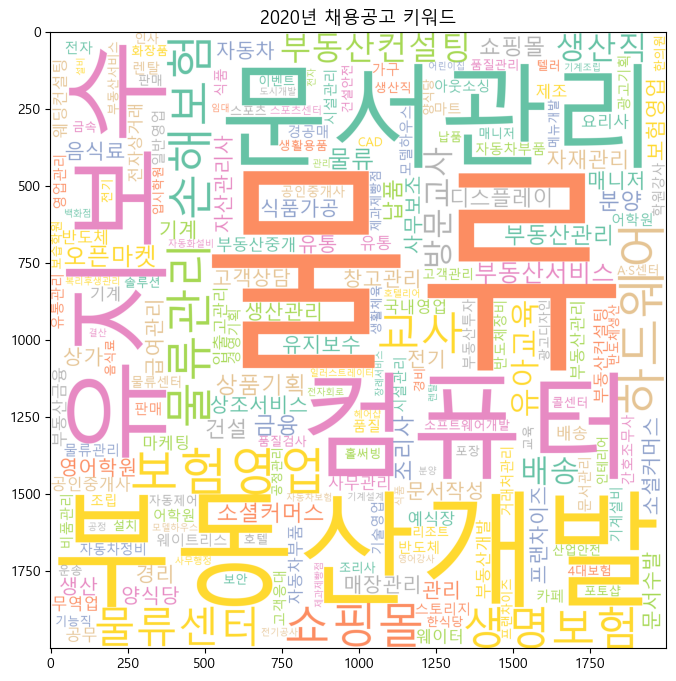

In [45]:
#2021년 wordcloud
wc = WordCloud(font_path='malgun', width=1000, height=1000, scale=2.0, max_font_size=350,  
               colormap = 'Set2', background_color = 'white')
gen = wc.generate_from_frequencies(count_2020)


plt.figure(figsize = (8, 8))
plt.title("2020년 채용공고 키워드", size = 13)
plt.imshow(gen)

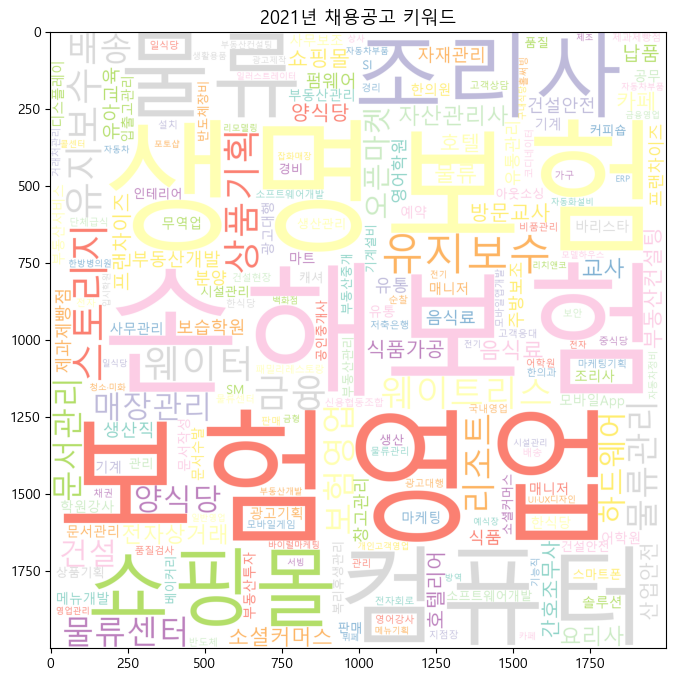

In [46]:
#2021년 wordcloud
wc = WordCloud(font_path='malgun', width=1000, height=1000, scale=2.0, max_font_size=350,  
               colormap = 'Set3', background_color = 'white')
gen = wc.generate_from_frequencies(count_2021)


plt.figure(figsize = (8, 8))
plt.title("2021년 채용공고 키워드", size = 13)
plt.imshow(gen)

### 최종 파일 저장

In [118]:
data3.to_csv('jobkorea_data.csv', index=False)

In [119]:
data_2020.to_csv('data_2020.csv', index=False)
data_2021.to_csv('data_2021.csv', index=False)